In [11]:
import pandas as pd 
import numpy as np 
# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# scaling and transform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

# Loading Dataset
df = pd.read_csv("./fifa_legacy.csv", low_memory=False)

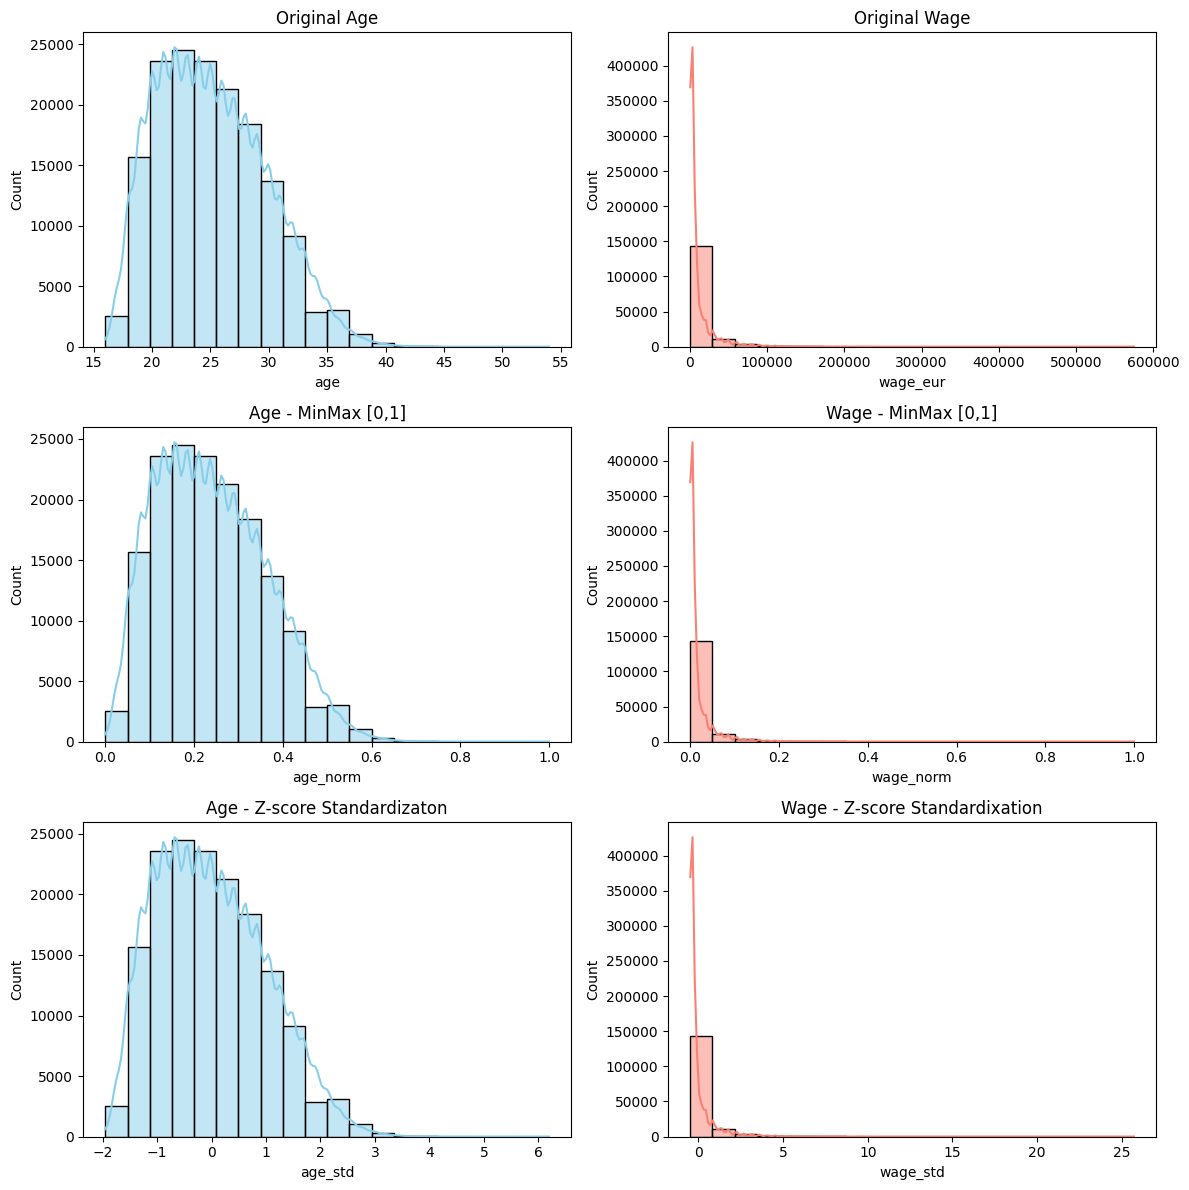

In [ ]:
# B1. Normalization & Standartization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features = df[["age", "wage_eur"]].dropna()

# Min-Max Normalization [0,1]
scaler_minmax = MinMaxScaler()
features_minmax = scaler_minmax.fit_transform(features)
df_minmax = pd.DataFrame(features_minmax, columns=["age_norm", "wage_norm"])

# Z-score Standarization
scaler_std = StandardScaler()
features_std = scaler_std.fit_transform(features)
df_std = pd.DataFrame(features_std, columns=["age_std", "wage_std"])

# histogramm: before and after
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Original data
sns.histplot(features["age"], bins=20, ax=axes[0,0], kde=True, color="skyblue")
axes[0,0].set_title("Original Age")
sns.histplot(features["wage_eur"], bins=20, ax=axes[0,1], kde=True, color="salmon")
axes[0,1].set_title("Original Wage")

# Min-Max Normalization
sns.histplot(df_minmax["age_norm"], bins=20, ax=axes[1,0], kde=True, color="skyblue")
axes[1,0].set_title("Age - MinMax [0,1]")
sns.histplot(df_minmax["wage_norm"], bins=20, ax=axes[1,1], kde=True, color="salmon")
axes[1,1].set_title("Wage - MinMax [0,1]")

# Standartization
sns.histplot(df_std["age_std"], bins=20, ax=axes[2,0], kde=True, color="skyblue")
axes[2,0].set_title("Age - Z-score Standardizaton")
sns.histplot(df_std["wage_std"], bins=20, ax=axes[2,1], kde=True, color="salmon")
axes[2,1].set_title("Wage - Z-score Standardixation")

plt.tight_layout()
plt.show()

New symbol 'wage_per_age' created:
   age  wage_eur  wage_per_age
0   27  550000.0  20370.370370
1   29  375000.0  12931.034483
2   30  275000.0   9166.666667
3   32  275000.0   8593.750000
4   28  300000.0  10714.285714

Discretization (Equal-width vs Equal-frequency):
Equal-width bins:
 age_equal_width
(15.962, 23.6]    66590
(23.6, 31.2]      78104
(31.2, 38.8]      16464
(38.8, 46.4]        422
(46.4, 54.0]          3
Name: count, dtype: int64

Equal-frequency bins:
 age_equal_freq
(15.999, 21.0]    41944
(21.0, 23.0]      24646
(23.0, 26.0]      34976
(26.0, 29.0]      29172
(29.0, 54.0]      30845
Name: count, dtype: int64

One-hot encoding for 'preferred_foot':
  preferred_foot  foot_Left  foot_Right
0           Left       True       False
1          Right      False        True
2           Left       True       False
3          Right      False        True
4          Right      False        True


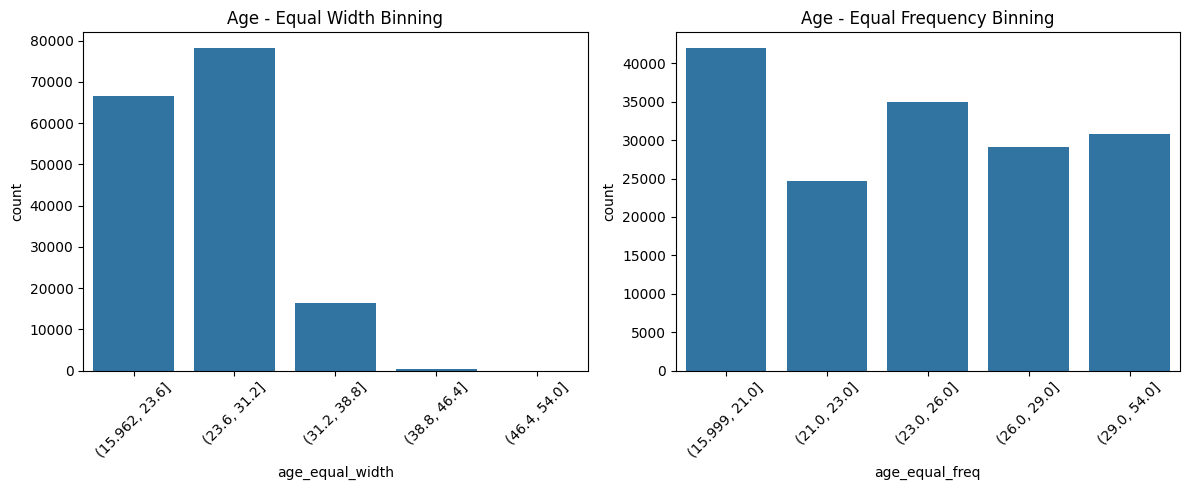

In [13]:
# B2. Feature Creation & Discretization
# 1. Feature Creation
df["wage_per_age"] = df["wage_eur"] / df["age"]

print("New symbol 'wage_per_age' created:")
print(df[["age", "wage_eur", "wage_per_age"]].head())

# 2. Discretization
# Equal-width binning (5 intervals of equal-width)
df["age_equal_width"] = pd.cut(df["age"], bins=5)
# Equal-frequency binning (by quantile of 5 groups)
df["age_equal_freq"] = pd.qcut(df["age"], q=5, duplicates="drop")

print("\nDiscretization (Equal-width vs Equal-frequency):")
print("Equal-width bins:\n", df["age_equal_width"].value_counts().sort_index())
print("\nEqual-frequency bins:\n", df["age_equal_freq"].value_counts().sort_index())

# 3. One-hot encoding
onehot = pd.get_dummies(df["preferred_foot"], prefix="foot")
df = pd.concat([df, onehot], axis=1)

print("\nOne-hot encoding for 'preferred_foot':")
print(df[["preferred_foot"] + list(onehot.columns)].head())

# 4. Visualization od discretization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="age_equal_width", data=df, ax=axes[0])
axes[0].set_title("Age - Equal Width Binning")
axes[0].tick_params(axis="x", rotation=45)

sns.countplot(x="age_equal_freq", data=df, ax=axes[1])
axes[1].set_title("Age - Equal Frequency Binning")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# %% [markdown]
# # 📄 Report B (B1, B2)
#
# ## B1. Normalization & Standardization  
# Two scaling techniques were applied to the **`age`** and **`wage_eur`** features:
#
# 1. **Min-Max Normalization [0,1]**  
#    - Transforms values into the range [0,1].  
#    - Preserves the shape of the distribution but rescales absolute values.  
#    - Useful for algorithms sensitive to magnitude (e.g., KNN, Neural Nets).  
#
# 2. **Z-score Standardization**  
#    - Transforms data to have mean = 0 and standard deviation = 1.  
#    - Highlights relative deviation from the mean.  
#    - Useful for models assuming Gaussian distribution (e.g., Logistic Regression, PCA).  
#
# 📊 **Visualization:**  
# - Original `wage_eur` distribution is highly right-skewed.  
# - Min-Max rescales but does not remove skewness.  
# - Z-score centers the distribution but still retains skewness.  
#
# **Conclusion:** Normalization is better for bounded rescaling, while Standardization is better for statistical modeling.
#
# ---
#
# ## B2. Feature Creation & Discretization  
#
# ### 1. Feature Creation  
# - A new variable **`wage_per_age`** = `wage_eur / age` was introduced.  
# - This highlights the wage efficiency relative to a player’s age.  
# - Younger players with high wages will have larger values, revealing market “rising stars.”  
#
# ### 2. Discretization  
# - **Equal-width binning (5 bins):** splits the `age` range into 5 equal intervals.  
#   - Easy to interpret but may group uneven numbers of players per bin.  
# - **Equal-frequency binning (5 quantiles):** ensures each bin has ~20% of players.  
#   - Better balance but may result in irregular bin ranges.  
#
# 📊 **Observation:** Equal-width bins had very different group sizes, while equal-frequency bins distributed players more evenly.  
#
# ### 3. One-hot Encoding  
# - Applied to **`preferred_foot`** (Left/Right).  
# - Created binary variables: `foot_Left`, `foot_Right`.  
# - Useful for machine learning models that require numeric input.  
#
# ### 4. Visualization  
# - Countplots confirmed the binning effect.  
# - Equal-width: large variation in counts across bins.  
# - Equal-frequency: more uniform distribution.  
#
# ---
#
# ### 🔑 Key Takeaways  
# - **Scaling (B1):** Normalization and Standardization change value ranges but not skewness.  
# - **Feature Creation (B2):** Derived attributes (e.g., wage_per_age) add new insights.  
# - **Discretization:** Equal-frequency is better for balancing groups; equal-width is simpler.  
# - **Encoding:** One-hot encoding is essential for categorical ML features.  


SyntaxError: invalid character '–' (U+2013) (3795742564.py, line 9)